In [1]:
import pandas as pd
import numpy as np

### Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [2]:
ratings = pd.read_csv("title_ratings.tsv", delimiter = '\t')

In [3]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1559
1,tt0000002,6.1,188
2,tt0000003,6.5,1221
3,tt0000004,6.1,114
4,tt0000005,6.1,1950


In [4]:
basics = pd.read_csv("title_basics.tsv", delimiter = '\t')

C:\Users\dellg7\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

In [7]:
year = basics[(basics.startYear >= 2000) & (basics.startYear <= 2009) & (basics.titleType == "movie")]
year.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34815,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
77560,tt0079204,movie,"Case #1, Case #2","Ghazieh-e Shekl-e Aval, Ghazieh-e Shekl-e Dou Wom",0,2004.0,\N,53,"Documentary,Drama"
86834,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
93978,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,\N,126,Drama
95420,tt0097540,movie,Responso,Responso,0,2004.0,\N,81,\N


In [8]:
merge = pd.merge(year, ratings, on='tconst')
merge.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,75544
1,tt0079204,movie,"Case #1, Case #2","Ghazieh-e Shekl-e Aval, Ghazieh-e Shekl-e Dou Wom",0,2004.0,\N,53,"Documentary,Drama",7.8,424
2,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.6,236
3,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,\N,126,Drama,5.8,614
4,tt0097540,movie,Responso,Responso,0,2004.0,\N,81,\N,7.4,5


In [9]:
popularSet = merge.sort_values('numVotes', ascending = False)

In [10]:
popularSet = popularSet[popularSet['titleType'] == "movie"]

In [11]:
print(popularSet.head(10)['averageRating'].mean())

8.52


### Find the year in the 1900s when the average rank increased the most, compared to the previous year. (Ignore movies with votes < 1000)

In [12]:
votes = ratings[ratings['numVotes'] > 1000]
votes.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1559
2,tt0000003,6.5,1221
4,tt0000005,6.1,1950
7,tt0000008,5.4,1680
9,tt0000010,6.9,5590


In [13]:
new = pd.merge(votes, basics, on = 'tconst')

In [14]:
new = new[new['titleType'] == "movie"]

In [15]:
year = new[(new['startYear'] >= 1900) & (new['startYear'] < 2000)]

In [16]:
out = year.groupby('startYear').agg(
    mp = ('averageRating', np.mean)
).reset_index()

In [17]:
out

,startYear,mp
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.600000
3,1915.0,6.800000
4,1916.0,7.000000
...,...,...
83,1995.0,6.413859
84,1996.0,6.337726
85,1997.0,6.436300
86,1998.0,6.424027


In [18]:
maxi = 0
yr = 0
for i in range(1, len(out)):
    v1 = out.loc[i, 'mp']
    v2 = out.loc[i-1, 'mp']
    temp = abs(v1 - v2)
    if temp> maxi:
        maxi = temp
        yr = out.loc[[i], ['startYear']]
yr

,startYear
17,1929.0


### Find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes < 1000.)


In [19]:
data = pd.merge(ratings, basics, on = 'tconst')
data.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1559,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,6.1,188,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,6.5,1221,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,114,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short"
4,tt0000005,6.1,1950,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"


In [20]:
vote = data[data['numVotes']>= 1000]
vote

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1559,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
2,tt0000003,6.5,1221,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
4,tt0000005,6.1,1950,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"
7,tt0000008,5.4,1680,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short"
9,tt0000010,6.9,5590,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...
1003266,tt9892204,7.4,1423,tvEpisode,Weekend Box Office: March 8 to 10,Weekend Box Office: March 8 to 10,0,2019.0,\N,1,News
1003379,tt9898836,9.9,8339,tvEpisode,Perfect Game,Perfect Game,0,2019.0,\N,24,"Action,Adventure,Animation"
1003452,tt9900782,8.7,4742,movie,Kaithi,Kaithi,0,2019.0,\N,145,"Action,Thriller"
1003541,tt9906260,10.0,23294,tvEpisode,Hero,Hero,0,2019.0,\N,24,"Action,Adventure,Animation"


In [21]:
vote = vote[vote['titleType'] == "movie"]
vote

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
922,tt0002130,7.0,2038,movie,Dante's Inferno,L'Inferno,0,1911.0,\N,68,"Adventure,Drama,Fantasy"
1109,tt0002844,7.0,1859,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913.0,\N,54,"Crime,Drama"
1143,tt0003037,7.0,1296,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913.0,\N,61,"Crime,Drama"
1164,tt0003165,7.0,1002,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913.0,\N,90,"Crime,Drama,Mystery"
1203,tt0003419,6.5,1657,movie,The Student of Prague,Der Student von Prag,0,1913.0,\N,85,"Drama,Fantasy,Horror"
...,...,...,...,...,...,...,...,...,...,...,...
1002252,tt9831136,5.0,1850,movie,The Banana Splits Movie,The Banana Splits Movie,0,2019.0,\N,89,"Comedy,Horror,Sci-Fi"
1002733,tt9860728,5.6,10669,movie,Falling Inn Love,Falling Inn Love,0,2019.0,\N,98,"Comedy,Romance"
1002867,tt9866700,3.7,1155,movie,Paranormal Investigation,Paranormal Investigation,0,2018.0,\N,92,"Horror,Thriller"
1003122,tt9882084,7.9,1464,movie,Chasing Happiness,Chasing Happiness,0,2019.0,\N,96,Documentary


In [22]:
out1 = vote.groupby('startYear').agg(
    avg = ('averageRating', np.mean)
).reset_index()

In [23]:
out1

,startYear,avg
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.600000
3,1915.0,6.800000
4,1916.0,7.000000
...,...,...
103,2015.0,6.201131
104,2016.0,6.201035
105,2017.0,6.206334
106,2018.0,6.319822


In [24]:
out1 = out1[out1.startYear != 2013]
out1

,startYear,avg
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.600000
3,1915.0,6.800000
4,1916.0,7.000000
...,...,...
103,2015.0,6.201131
104,2016.0,6.201035
105,2017.0,6.206334
106,2018.0,6.319822


In [25]:
from sklearn.linear_model import LinearRegression
x = out1['startYear'].values.reshape(-1,1)
y = out1['avg'].values.reshape(-1,1)

In [26]:
model = LinearRegression().fit(x,y)

In [27]:
xtest = np.array([2013]).reshape(-1,1)
y_pred = model.predict(xtest)
print(y_pred)
# Original average rating for 2013	7.069302

[[6.24475389]]


In [28]:
import matplotlib.pyplot as plt  # To visualize

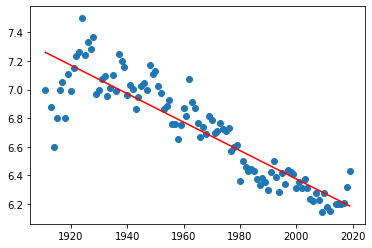

In [29]:
temp_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, temp_pred, color='red')
plt.show()

### Find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?


In [30]:
corryear = basics[(basics['startYear']>= 1900) & (basics['startYear'] < 2000)]

In [31]:
corrData = pd.merge(ratings, corryear, on='tconst')
corrData

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000160,5.8,8,short,The Last Days of Pompeii,The Last Days of Pompeii,0,1900.0,\N,\N,"Drama,Short"
1,tt0000265,4.6,93,short,Above the Limit,Above the Limit,0,1900.0,\N,\N,"Comedy,Short"
2,tt0000269,5.2,91,short,"Army Life; or, How Soldiers Are Made: Mounted ...",Army Life,0,1900.0,\N,\N,"Documentary,Short"
3,tt0000271,7.3,6,short,Arrivée de Pierette et Pierrot,Arrivée de Pierette et Pierrot,0,1900.0,\N,\N,Short
4,tt0000272,5.6,627,short,As Seen Through a Telescope,As Seen Through a Telescope,0,1900.0,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...,...,...
345967,tt9909498,7.6,9,video,Pink Floyd: Interstellar Overdrive,Pink Floyd: Interstellar Overdrive,0,1967.0,\N,17,"Music,Short"
345968,tt9909520,7.3,6,video,Pink Floyd: Nick's Boogie,Pink Floyd: Nick's Boogie,0,1967.0,\N,12,"Music,Short"
345969,tt9909812,7.0,5,video,Alice Cooper: Hey Stoopid,Alice Cooper: Hey Stoopid,0,1991.0,\N,5,"Music,Short"
345970,tt9909866,5.4,5,video,Nora,Nora,0,1985.0,\N,45,"Action,Adventure,Animation"


In [32]:
corrData = corrData[corrData['titleType'] == "movie"]

In [63]:
# dic = {}
# for i in range(1900, 2000):
#     rat = []
#     vot = []
#     for j in range(len(corrData)):
#         if corrData['startYear'][j] == i:
#             rat.append(corrData['averageRating'][j])
#             vot.append(corrData['numVotes'][j])
#     dic[i] = [rat, vot]

In [33]:
years = list(corrData['startYear'].unique())
yearCorr = pd.DataFrame()
for year in years:
    X=corrData[corrData['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    yearCorr = yearCorr.append(newRow, ignore_index=True)
yearCorr = yearCorr.reindex(columns=['Year', 'Correlation'])
yearCorr

,Year,Correlation
0,1900.0,-0.207526
1,1906.0,0.772264
2,1907.0,0.150060
3,1908.0,0.169502
4,1909.0,0.235725
...,...,...
95,1905.0,0.489129
96,1902.0,-0.365925
97,1904.0,0.485731
98,1903.0,0.483887


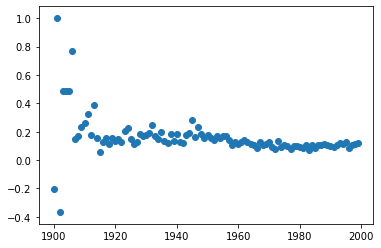

In [34]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(yearCorr['Year'],yearCorr['Correlation'])

<BarContainer object of 100 artists>

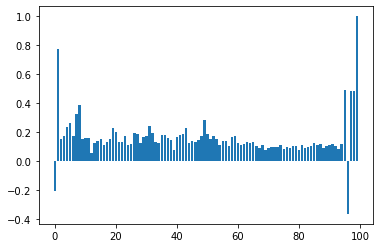

In [35]:
plt.bar(np.arange(len(yearCorr['Year'])), yearCorr['Correlation'])
# plt.xticks(np.arange(len(yearCorr['Year'])), yearCorr['Year'])

C:\Python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


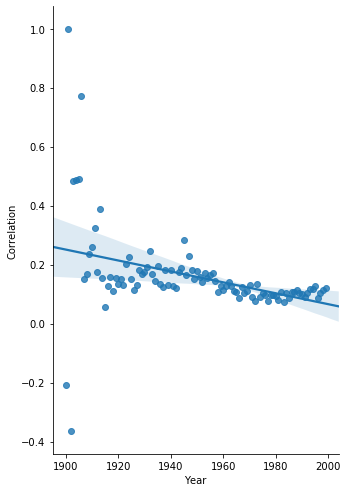

In [36]:
import seaborn as sns
sns.pairplot(yearCorr, x_vars='Year', y_vars='Correlation', size=7, aspect=0.7, kind='reg')